### 数据读取模块


In [1]:
import paddle
from paddle.vision.transforms import Normalize, Compose, Transpose
from paddle.vision.datasets import Cifar10
from paddle.vision.transforms import Resize
def get_cifar10_dataloader():
    # cifar10是一个三通道的图片
    transforms = Compose([Resize(64),Normalize(mean=[127.5, 127.5, 127.5], std= [127.5, 127.5, 127.5], data_format='HWC'),Transpose() ])
    # 数据集
    train_datasets = Cifar10(mode='train', transform=transforms)
    test_datasets = Cifar10(mode='test', transform=transforms)
    # 数据读取器
    train_loader = paddle.io.DataLoader(train_datasets, batch_size=128, shuffle = True, num_workers=2, drop_last=True)
    test_loader = paddle.io.DataLoader(test_datasets, batch_size=128, shuffle = False, num_workers=2, drop_last=False)
    return train_loader, test_loader

In [23]:
import paddle
from paddle.vision.transforms import Normalize, Compose, Transpose
from paddle.vision.datasets import Cifar10
from paddle.vision.transforms import Resize

def get_cifar10_dataloader(class_id=9):
    # cifar10是一个三通道的图片
    transforms = Compose([
        Resize(64),
        Normalize(mean=[127.5, 127.5, 127.5], std=[127.5, 127.5, 127.5], data_format='HWC'),
        Transpose()
    ])

    # 数据集
    train_datasets = Cifar10(mode='train', transform=transforms)
    test_datasets = Cifar10(mode='test', transform=transforms)

    # 找到指定类别的图像索引
    train_indices = [idx for idx in range(len(train_datasets)) if train_datasets.__getitem__(idx)[1] == class_id]
    test_indices = [idx for idx in range(len(test_datasets)) if test_datasets.__getitem__(idx)[1] == class_id]

    # 使用 Subset 对象来加载特定类别的数据
    subset_train = paddle.io.Subset(train_datasets, train_indices)
    subset_test = paddle.io.Subset(test_datasets, test_indices)

    # 数据读取器
    train_loader = paddle.io.DataLoader(subset_train, batch_size=128, shuffle=True, num_workers=2, drop_last=True)
    test_loader = paddle.io.DataLoader(subset_test, batch_size=128, shuffle=False, num_workers=2, drop_last=False)

    return train_loader, test_loader


In [24]:
train_loader, test_loader = get_cifar10_dataloader()
for batch_id, data in enumerate(train_loader()):
    print(batch_id, data[0], data[1].shape)
    break

0 Tensor(shape=[128, 3, 64, 64], dtype=float32, place=Place(gpu_pinned), stop_gradient=True,
       [[[[ 0.67058825,  0.64705884,  0.60784316, ...,  0.59215689,
            0.55294120,  0.52941179],
          [ 0.66274512,  0.64705884,  0.62352943, ...,  0.59215689,
            0.55294120,  0.52941179],
          [ 0.65490198,  0.64705884,  0.64705884, ...,  0.59215689,
            0.54509807,  0.52156866],
          ...,
          [-0.11372549, -0.10588235, -0.09019608, ..., -0.14509805,
           -0.16078432, -0.16862746],
          [-0.11372549, -0.10588235, -0.09803922, ..., -0.17647059,
           -0.18431373, -0.19215687],
          [-0.11372549, -0.10588235, -0.09803922, ..., -0.19215687,
           -0.20000000, -0.20784314]],

         [[ 0.74117649,  0.71764708,  0.66274512, ...,  0.25490198,
            0.23921569,  0.23137255],
          [ 0.73333335,  0.71764708,  0.67058825, ...,  0.25490198,
            0.23921569,  0.22352941],
          [ 0.70980394,  0.70980394,  0.69

[[[ 89 162 230]
  [ 89 162 230]
  [ 90 161 231]
  ...
  [ 75 112 144]
  [ 70 105 138]
  [ 68 102 135]]

 [[ 90 163 230]
  [ 90 163 230]
  [ 91 162 231]
  ...
  [ 78 113 143]
  [ 75 108 139]
  [ 73 106 137]]

 [[ 93 164 230]
  [ 93 164 231]
  [ 94 164 232]
  ...
  [ 84 114 141]
  [ 84 113 140]
  [ 83 113 140]]

 ...

 [[229 197 177]
  [229 198 178]
  [228 198 178]
  ...
  [ 85  82  77]
  [ 85  82  76]
  [ 84  81  75]]

 [[233 204 186]
  [232 203 185]
  [231 203 183]
  ...
  [ 90  87  79]
  [ 88  85  77]
  [ 87  83  76]]

 [[235 207 190]
  [234 206 189]
  [232 205 186]
  ...
  [ 92  89  80]
  [ 89  86  78]
  [ 88  84  77]]]
[[[162 184 202]
  [148 169 189]
  [119 140 163]
  ...
  [ 99 110 133]
  [ 85  95 116]
  [ 78  87 107]]

 [[168 189 207]
  [153 173 193]
  [123 143 166]
  ...
  [101 112 135]
  [ 85  95 116]
  [ 77  86 106]]

 [[180 199 216]
  [163 182 201]
  [130 148 171]
  ...
  [105 117 139]
  [ 85  96 116]
  [ 75  85 104]]

 ...

 [[177 168 164]
  [174 165 161]
  [169 160 156]
  ..

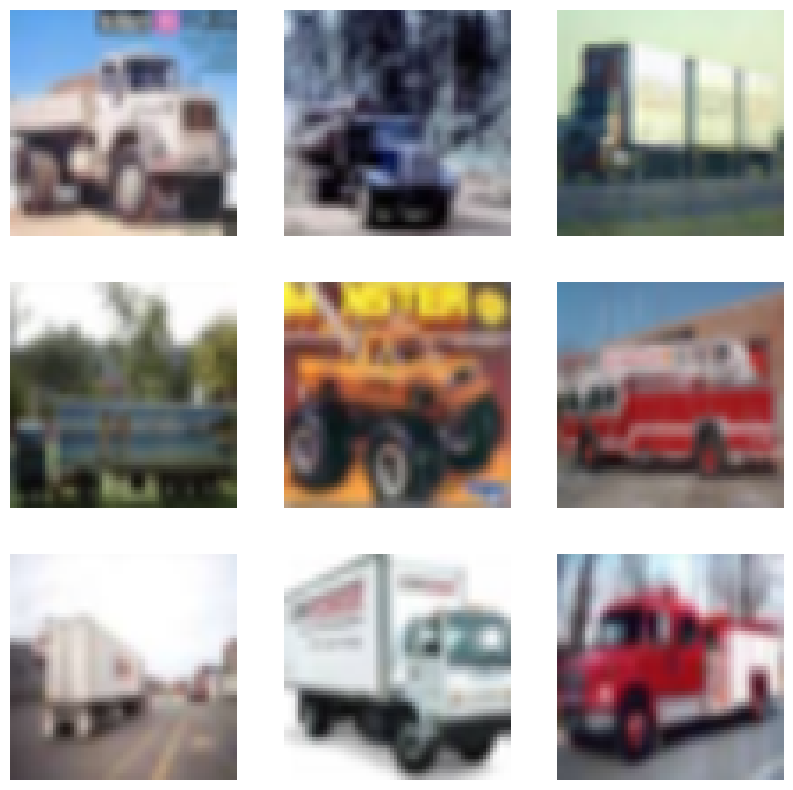

In [25]:
from matplotlib import pyplot as plt
import numpy as np

for batch_id, data in enumerate(train_loader()):
    plt.figure(figsize=(10, 10))
    try:
        for i in range(9):  # 显示前9张图像
            image = np.array(data[0][i]).transpose((1, 2, 0))  # 调整轴顺序以匹配matplotlib的预期
            # 反归一化
            denormalized_image = (image * 127.5 + 127.5).astype(np.uint8)
            print(denormalized_image)
            plt.subplot(3, 3, i + 1)
            plt.imshow(denormalized_image)
            plt.axis('off')
        plt.show()
        break
    except IOError:
        print(IOError)


## 权重初始化

In [26]:
conv_initializer=paddle.nn.initializer.Normal(mean=0.0, std=0.02)
bn_initializer=paddle.nn.initializer.Normal(mean=1.0, std=0.02)


## 判别器

In [27]:
import paddle
import paddle.nn as nn
import paddle.nn.functional as F

class Discriminator(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2D(
            3,64,4,2,1,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
        self.conv_2 = nn.Conv2D(
            64,128,4,2,1,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
        self.bn_2 = nn.BatchNorm2D(
            128,
            weight_attr=paddle.ParamAttr(initializer=bn_initializer),momentum=0.8
            )
        self.conv_3 = nn.Conv2D(
            128,256,4,2,1,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
        self.bn_3 = nn.BatchNorm2D(
            256,
            weight_attr=paddle.ParamAttr(initializer=bn_initializer),momentum=0.8
            )
        self.conv_4 = nn.Conv2D(
            256,512,4,2,1,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
        self.bn_4 = nn.BatchNorm2D(
            512,
            weight_attr=paddle.ParamAttr(initializer=bn_initializer),momentum=0.8
            )
        self.conv_5 = nn.Conv2D(
            512,1,4,1,0,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
    
    def forward(self, x):
        x = self.conv_1(x)
        x = F.leaky_relu(x,negative_slope=0.2)
        x = self.conv_2(x)
        x = self.bn_2(x)
        x = F.leaky_relu(x,negative_slope=0.2)
        x = self.conv_3(x)
        x = self.bn_3(x)
        x = F.leaky_relu(x,negative_slope=0.2)
        x = self.conv_4(x)
        x = self.bn_4(x)
        x = F.leaky_relu(x,negative_slope=0.2)
        x = self.conv_5(x)
        x = F.sigmoid(x)
        return x


## 生成器

In [28]:

class Generator(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2DTranspose(
            100,512,4,1,0,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
        self.bn_1 = nn.BatchNorm2D(
            512,
            weight_attr=paddle.ParamAttr(initializer=bn_initializer),momentum=0.8
            )
        self.conv_2 = nn.Conv2DTranspose(
            512,256,4,2,1,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
        self.bn_2 = nn.BatchNorm2D(
            256,
            weight_attr=paddle.ParamAttr(initializer=bn_initializer),momentum=0.8
            )
        self.conv_3 = nn.Conv2DTranspose(
            256,128,4,2,1,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
        self.bn_3 = nn.BatchNorm2D(
            128,
            weight_attr=paddle.ParamAttr(initializer=bn_initializer),momentum=0.8
            )
        self.conv_4 = nn.Conv2DTranspose(
            128,64,4,2,1,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
        self.bn_4 = nn.BatchNorm2D(
            64,
            weight_attr=paddle.ParamAttr(initializer=bn_initializer),momentum=0.8
            )
        self.conv_5 = nn.Conv2DTranspose(
            64,3,4,2,1,
            bias_attr=False,weight_attr=paddle.ParamAttr(initializer=conv_initializer)
            )
        self.tanh = paddle.nn.Tanh()
    
    def forward(self, x):
        x = self.conv_1(x)
        x = self.bn_1(x)
        x = F.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)
        x = F.relu(x)
        x = self.conv_3(x)
        x = self.bn_3(x)
        x = F.relu(x)
        x = self.conv_4(x)
        x = self.bn_4(x)
        x = F.relu(x)
        x = self.conv_5(x)
        x = self.tanh(x)
        return x


## 损失函数

In [29]:
loss = paddle.nn.BCELoss()

In [38]:
import visualdl
import visualdl.server.app 
visualdl.server.app.run('./work',
                        host="127.0.0.1",
                        port=8080,
                        cache_timeout=20)

17440

## 模型训练

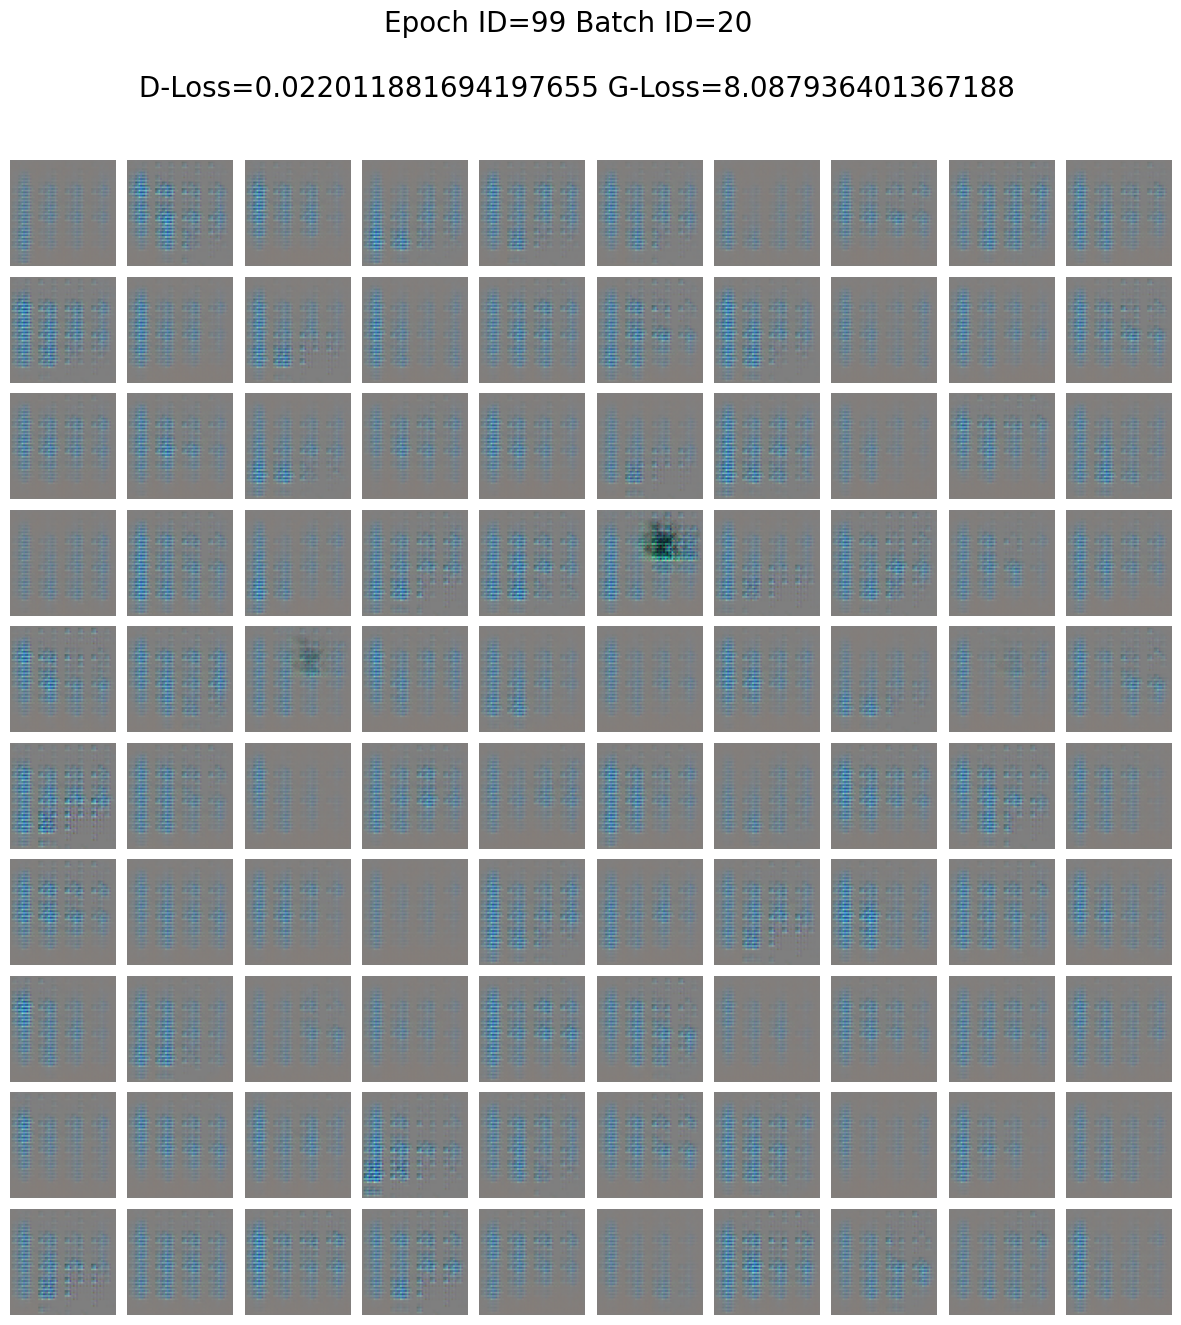

In [37]:
import os
import IPython.display as display
import warnings
import paddle.optimizer as optim
warnings.filterwarnings('ignore')

img_dim = 64  # 图片的大小
lr = 0.001  # 学习率
epoch = 100  # 训练的轮数
output = "work/Output5/"  # 图片的保存路径
batch_size = 128  # 批次大小
G_DIMENSION = 100# 噪声的维度
beta1=0.5  # Adam优化器的beta1参数
beta2=0.999  # Adam优化器的beta2参数
output_path = 'work/Output5'  # 图片保存路径
device = paddle.set_device('gpu')  # 指定gpu
paddle.disable_static(device)  # 关闭静态图模式
gen_train_iterations = 1  # 生成器的训练次数
disc_train_iterations = 1  # 判别器的训练次数

real_label = 1.
fake_label = 0.

netD = Discriminator()  # 判别器
netG = Generator()  # 生成器 
optimizerD = optim.Adam(parameters=netD.parameters(), learning_rate=lr, beta1=beta1, beta2=beta2)  # Adam优化器
optimizerG = optim.Adam(parameters=netG.parameters(), learning_rate=lr, beta1=beta1, beta2=beta2)  # Adam优化器

###训练过程
losses = [[], []]

from visualdl import LogWriter
logwriter = LogWriter(logdir="./work/train8")
now = 0
iter = 0
for pass_id in range(epoch):
    # enumerate()函数将一个可遍历的数据对象组合成一个序列列表
    for batch_id, data in enumerate(train_loader()):
        #训练判别器 
        for _ in range(disc_train_iterations):
            optimizerD.clear_grad()  # 清除判别器的梯度
            real_cpu = data[0]  # 真实图片
            label = paddle.full((batch_size,1,1,1),real_label,dtype='float32')  # 正样本label为1
            output = netD(real_cpu)
            errD_real = loss(output,label)
            errD_real.backward()
            optimizerD.step()
            optimizerD.clear_grad()

            noise = paddle.randn([batch_size,G_DIMENSION,1,1],'float32')  # 生成噪声
            fake = netG(noise)
            label = paddle.full((batch_size,1,1,1),fake_label,dtype='float32')
            output = netD(fake.detach())   # 判别器判别生成的假图像
            errD_fake = loss(output,label)
            errD_fake.backward()
            optimizerD.step()
            optimizerD.clear_grad()

            errD = errD_real + errD_fake
            
            losses[0].append(errD.numpy()[0])
        ###训练生成器
        for _ in range(gen_train_iterations):
            optimizerG.clear_grad()  # 清除生成器的梯度
            noise = paddle.randn([batch_size,G_DIMENSION,1,1],'float32')  # 生成噪声
            fake = netG(noise) # 生成假图像
            label = paddle.full((batch_size,1,1,1),real_label,dtype=np.float32,) # 正样本label为1
            output = netD(fake)     # 判别器判别生成的假图像
            errG = loss(output,label)  # 计算生成器的损失
            errG.backward()
            optimizerG.step()
            optimizerG.clear_grad()
        
        losses[1].append(errG.numpy()[0])
        if batch_id % 20 == 0:
            if not os.path.exists(output_path):
                os.makedirs(output_path)
            # 每轮的生成结果
            generated_image = netG(noise).numpy()
            imgs = []
            plt.figure(figsize=(15,15))
            try:
                for i in range(100):
                    image = generated_image[i].transpose((1, 2, 0))  # 调整轴顺序以匹配matplotlib的预期
                    # image = np.where(image > 0, image, 0)  # 将生成的图片中小于0的像素点置为0
                    image = (image * 127.5 + 127.5).astype(np.uint8)
                    plt.subplot(10, 10, i + 1)
                    plt.imshow(image, vmin=-1, vmax=1)
                    plt.axis('off')
                    plt.xticks([])
                    plt.yticks([])
                    plt.subplots_adjust(wspace=0.1, hspace=0.1)
                msg = 'Epoch ID={0} Batch ID={1} \n\n D-Loss={2} G-Loss={3}'.format(pass_id, batch_id, errD.numpy()[0], errG.numpy()[0])
                iter+=20
                logwriter.add_scalar(tag = 'train/D-loss' , step = iter, value=errD.numpy()[0])
                logwriter.add_scalar(tag = 'train/G-loss' , step = iter*4, value=errG.numpy()[0])
                plt.suptitle(msg,fontsize=20)
                plt.draw()
                plt.savefig('{}/{:04d}_{:04d}.png'.format(output_path, pass_id, batch_id),bbox_inches='tight')
                plt.pause(0.01)
                display.clear_output(wait=True)
            except IOError:
                print(IOError)
    paddle.save(netG.state_dict(), "work/generator.params")

plt.close()
